## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())



Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=163)


It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

# Now try Cross Validation using Timeseries split

In [54]:
best_features= [['LXV_12hr_delta_Pressure_hp', 'CMtn_Dewpoint_degC', 'CMtn_WindSpeed_mps'], \
                ['LXV_12hr_delta_Pressure_hp', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_Dewpoint_degC']]

X_feat,Y_actsnf = [], []
X_dates = []

for bf in np.arange(0,len(best_features),1):               
  X_temp, Y_temp = [], []

  idx = []

                
  #Surface features (X) and corresponding snowfall (Y)
  idx = np.isfinite(asos_snotel_UA_df['2006':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
  for v in best_features[bf]: 
    idx = idx_0617  & np.isfinite(asos_snotel_UA_df['2006':'2017'][v])


  Y_temp= round(asos_snotel_UA_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006':'2017'][idx],0)
  Y_actsnf.append(Y_temp.tolist())

  X_temp = asos_snotel_UA_df['2006':'2017'][best_features[bf]][idx].apply(lambda x: x.tolist(), axis=1)   # only want SFC variables 
  X_feat.append(X_temp.tolist())
  print(len(X_feat[bf]), len(Y_actsnf[bf]))
 
  #Need the timestamps which corresponds to each feature list generated above for some histogram plots
  X_dates.append(asos_snotel_UA_df['2006':'2017'][idx].index.tolist())          #.apply(lambda x: x.tolist(), axis=1)




227 227
227 227


In [55]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
lm = linear_model.LinearRegression()

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn import metrics


kfcv = KFold(n_splits=5, shuffle = True, random_state = 5)
print(kfcv)  
print(len(X_feat_0617))
print(len(Y_actsnf_0617))
for train_index, test_index in kfcv.split(X_feat[0]):
  print("TRAIN:", train_index, "TEST:", test_index)


KFold(n_splits=5, random_state=5, shuffle=True)
227
2
TRAIN: [  0   1   2   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  23  24  27  29  30  31  32  33  35  36  38  39  40  41  43  44
  45  47  49  50  52  54  56  57  58  59  62  63  64  65  66  67  68  69
  70  71  72  73  74  76  78  79  80  81  82  83  85  86  87  91  92  93
  94  95  97  98  99 100 103 105 106 107 108 109 110 111 112 113 115 116
 117 118 119 120 121 122 123 124 125 126 128 129 131 132 133 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 151 153 154 155 156 157
 158 159 161 162 163 164 165 166 167 169 170 171 173 175 176 178 179 180
 181 182 184 185 186 187 188 189 190 191 192 195 196 198 199 200 201 203
 204 205 206 207 208 210 211 212 213 215 216 218 219 220 222 223 224 225
 226] TEST: [  3   6  21  25  26  28  34  37  42  46  48  51  53  55  60  61  75  77
  84  88  89  90  96 101 102 104 114 127 130 134 150 152 160 168 172 174
 177 183 193 194 197 202 209 214 217 221]
TRAIN: [ 

TRAIN: [  0   1   2   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  23  24  27  29  30  31  32  33  35  36  38  39  40  41  43  44
  45  47  49  50  52  54  56  57  58  59  62  63  64  65  66  67  68  69
  70  71  72  73  74  76  78  79  80  81  82  83  85  86  87  91  92  93
  94  95  97  98  99 100 103 105 106 107 108 109 110 111 112 113 115 116
 117 118 119 120 121 122 123 124 125 126 128 129 131 132 133 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 151 153 154 155 156 157
 158 159 161 162 163 164 165 166 167 169 170 171 173 175 176 178 179 180
 181 182 184 185 186 187 188 189 190 191 192 195 196 198 199 200 201 203
 204 205 206 207 208 210 211 212 213 215 216 218 219 220 222 223 224 225
 226] TEST: [  3   6  21  25  26  28  34  37  42  46  48  51  53  55  60  61  75  77
  84  88  89  90  96 101 102 104 114 127 130 134 150 152 160 168 172 174
 177 183 193 194 197 202 209 214 217 221]
46
[-4.2276105231056205]
TRAIN: [  0   2   3   4   5   6   7   

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ens

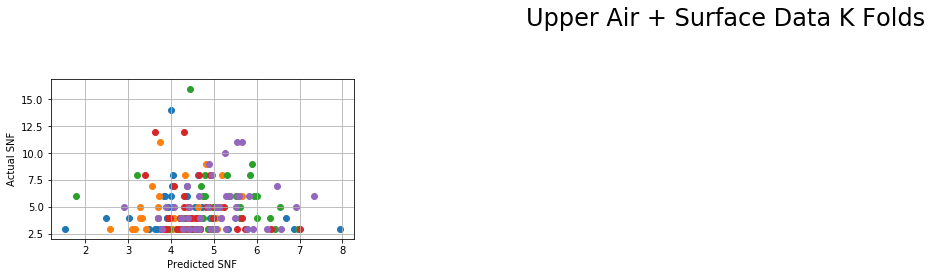

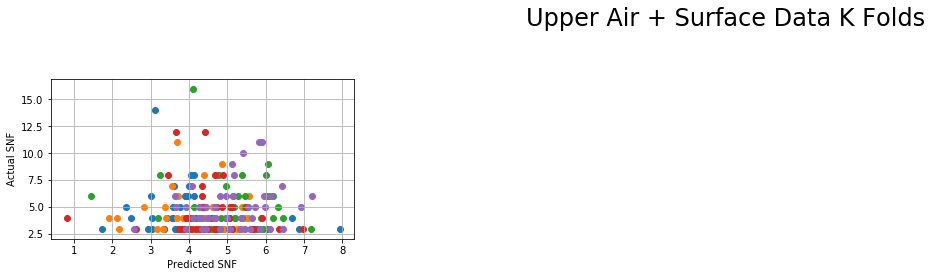

In [60]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error


for f in np.arange(0,len(X_feat),1):



 slopes, intercepts, r_values, p_values, std_errs,  rmse = [],[],[],[],[], [] 
 R2_scores =[]
 all_Ytest_predictions, all_Ytests = [], []
 all_Ytest_predictions_arrays, all_Ytests_arrays = [],[]
 X_train, Y_train = np.array([]), np.array([])




#Surface Only
 fig = plt.figure(figsize=(25,10))
 fig.suptitle('Upper Air + Surface Data K Folds', fontsize=24)
 count = 1

 for train_index, test_index in kfcv.split(X_feat[f]):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train =  np.array(X_feat[f])[train_index]
   X_test =  np.array(X_feat[f])[test_index]
   Y_train =  np.array(Y_actsnf[f])[train_index]
   Y_test =   np.array(Y_actsnf[f])[test_index]
   model = lm.fit(X_train, Y_train)
 #Y_predsnf = lm.predict(X_test)
   Ytest_predictions = cross_val_predict(model, X_test, Y_test)
   print(len(Y_test))
   R2_scores.append(metrics.r2_score(Ytest_predictions, Y_test))
   slope, intercept, r_value, p_value, std_err = linregress(Ytest_predictions, Y_test)    
   slopes.append(slope)
   intercepts.append(intercept)
   r_values.append(r_value)
   p_values.append(p_value)
   std_errs.append(std_err)
   mse = mean_squared_error(Ytest_predictions, Y_test)
   rmse.append(np.sqrt(mse))  
   all_Ytest_predictions_arrays.append(Ytest_predictions)   #creates list of arrays
   all_Ytests_arrays.append(Y_test)   #creates list of arrays

     
   ax = fig.add_subplot(3,4,count)
   ax.scatter(Ytest_predictions, Y_test)
   ax.set_xlabel('Predicted SNF', fontsize = 10)
   ax.set_ylabel('Actual SNF', fontsize = 10)
   print(R2_scores)  
   ax.grid(True)
 count = count +1

    
    
#all_Ytest_predictions = [val for sublist in  all_Ytest_predictions_arrays for val in sublist]   #flattens list of arrays into single list of values
#all_Ytests = [val for sublist in   all_Ytests_arrays for val in sublist]   #flattens list of arrays into single list of values


